Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

-Multiplications:
For each element we will need to perform k multiplications. And there are n*m total elements in the resulting matrix. Therefore the total number of multiplictions will be n * m * k.

-Additions:
For each element we perform k-1 adition for n*m elements, ans= n* m *(k-1).


Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [36]:
import random
import time
import numpy as np

rows_A = 3
cols_A = 4
cols_B = 2

# Function to create a matrix with specified dimensions
def create_matrix(num_rows, num_cols):
    return [random.sample(range(1, 10), num_cols) for _ in range(num_rows)]

matrix_A = create_matrix(rows_A, cols_A)
matrix_B = create_matrix(cols_A, cols_B)

print("Matrix A:")
print(matrix_A)
print("Matrix B:")
print(matrix_B)

def matrix_multiply(matrix_A, matrix_B):
    num_rows_A = len(matrix_A)        # Number of rows in A
    num_cols_A = len(matrix_A[0])     # Number of columns in A
    num_rows_B = len(matrix_B)        # Number of rows in B
    num_cols_B = len(matrix_B[0])     # Number of columns in B

    if num_cols_A != num_rows_B:
        return -1  # Incompatible matrices for multiplication
    
    # Initialize result matrix with zeros
    result_matrix = [[0 for _ in range(num_cols_B)] for _ in range(num_rows_A)]
    
    # Perform matrix multiplication
    for i in range(num_rows_A):
        for j in range(num_cols_B):
            for k in range(num_cols_A):
                result_matrix[i][j] += matrix_A[i][k] * matrix_B[k][j]

    return result_matrix

# Measure time for custom matrix multiplication
start_time = time.time()
result_matrix = matrix_multiply(matrix_A, matrix_B)
end_time = time.time()

print("Resultant Matrix :")
print(result_matrix)
time_python = end_time - start_time
print(f"Elapsed Time : {time_python:.6f} seconds")

# NumPy array generation
mat_A_np = np.array(matrix_A)
mat_B_np = np.array(matrix_B)
print("Matrix A (NumPy):")
print(mat_A_np)
print("Matrix B (NumPy):")
print(mat_B_np)

# Matrix multiplication using NumPy
start_time = time.time()
res_Mat_np = np.dot(mat_A_np, mat_B_np)
end_time = time.time()

print("Resultant Matrix from NumPy:")
print(res_Mat_np)
time_numpy = end_time - start_time
print(f"Elapsed Time for NumPy: {time_numpy:.6f} seconds")

# Difference in time
time_difference = time_numpy - time_python
print(f"Time Difference : {time_difference:.6f} seconds")


Matrix A:
[[8, 7, 9, 4], [6, 7, 9, 8], [9, 3, 4, 7]]
Matrix B:
[[5, 7], [5, 1], [8, 3], [3, 7]]
Resultant Matrix :
[[159, 118], [161, 132], [113, 127]]
Elapsed Time : 0.000000 seconds
Matrix A (NumPy):
[[8 7 9 4]
 [6 7 9 8]
 [9 3 4 7]]
Matrix B (NumPy):
[[5 7]
 [5 1]
 [8 3]
 [3 7]]
Resultant Matrix from NumPy:
[[159 118]
 [161 132]
 [113 127]]
Elapsed Time for NumPy: 0.000000 seconds
Time Difference : 0.000000 seconds


Q4. What is the gradient of the following function with respect to x and y?
x^2*y + y^3*sin(x)

(x^2)*y + (y^3)sin(x)

1. gradient with respect to x
    2*x*y + (y^3)cos(x)

2. gradient with respect to y
    x^2 + 3*(y^2)sin(x)

Gradient of {(x^2)*y + (y^3)sin(x)} = (2*x*y + (y^3)cos(x), x^2 + 3*(y^2)sin(x))

Q7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [37]:
dict = {
    2022: {
        'Branch 1': {
            1: {
               'Roll Number': 1,
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            }
        },
        'Branch 2': {}
    } ,
    2023:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2024:{
        'Branch 1': {},
        'Branch 2': {}
    },
    2025:{
        'Branch 1': {},
        'Branch 2': {}
    }
}
dict

{2022: {'Branch 1': {1: {'Roll Number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}}},
  'Branch 2': {}},
 2023: {'Branch 1': {}, 'Branch 2': {}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [38]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def set_mark(self, subject, mark):
        self.marks[subject] = mark


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def enroll_student(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


year_2022 = Year(2022)

branch_1_2022 = Branch("Branch 1")
student_1_2022 = Student(1, "N")
student_1_2022.set_mark("Maths", 100)
student_1_2022.set_mark("English", 70)
branch_1_2022.enroll_student(student_1_2022)

branch_2_2022 = Branch("Branch 2")

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)

year_2023 = Year(2023)
branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")
year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)

year_2024 = Year(2024)
branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")
year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)

year_2025 = Year(2025)
branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")
year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)

database = [year_2022, year_2023, year_2024, year_2025]

for year in database:
    print(year.year)
    for branch in year.branches:
        print(f"    {branch.name}")
        for student in branch.students:
            print(f"        Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


2022
    Branch 1
        Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

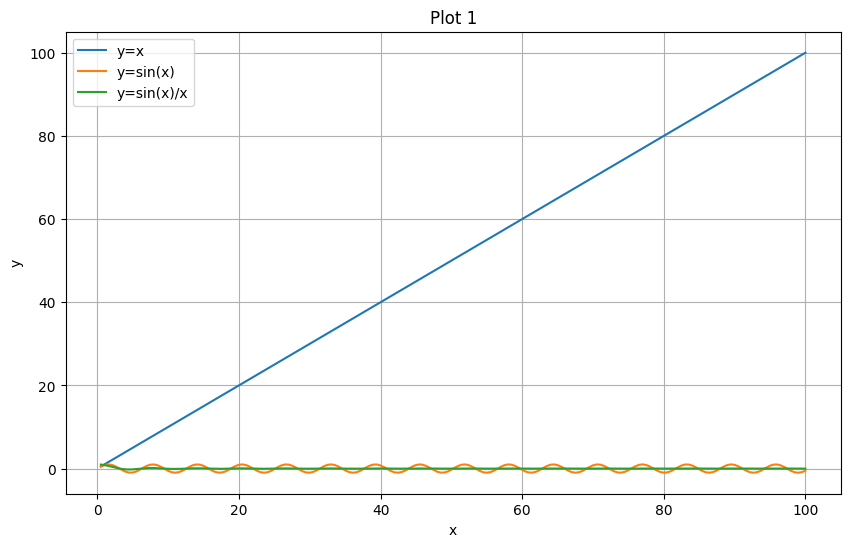

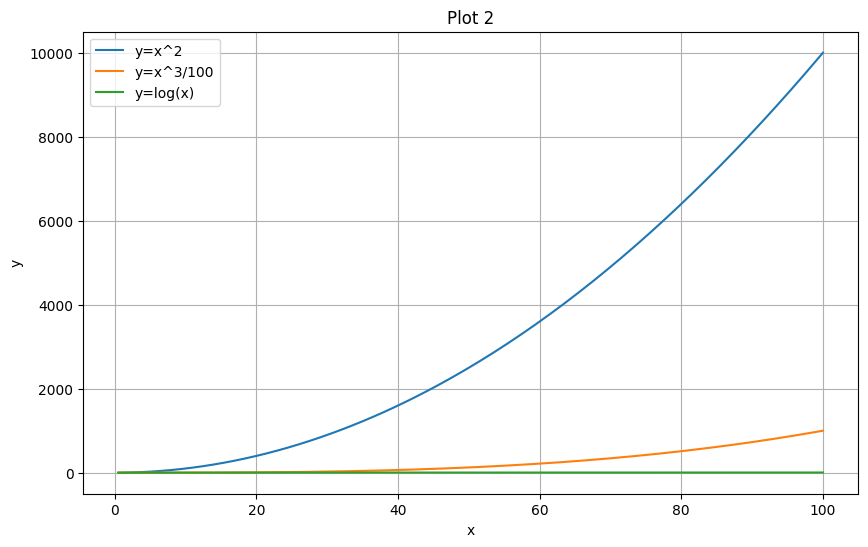

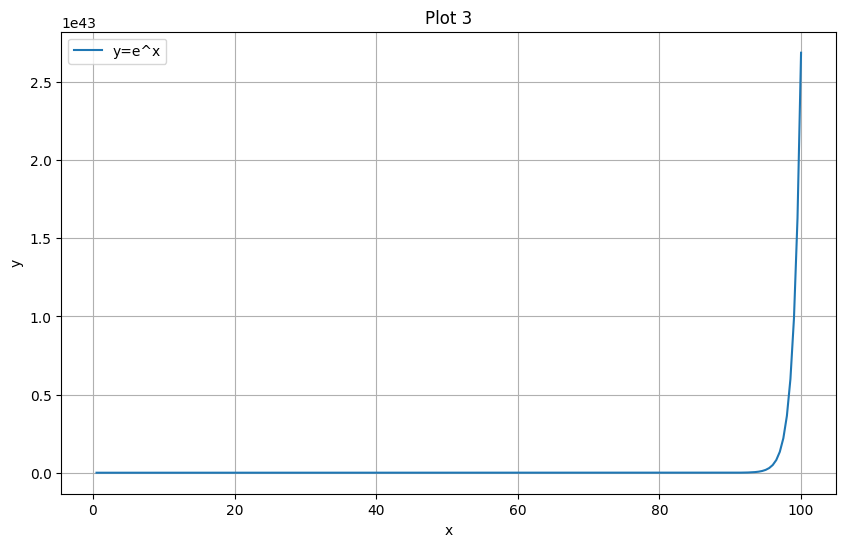

In [39]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = int((100.0 - 0.5) / 0.5) + 1
x_values = np.linspace(0.5, 100.0, num_steps)

y_x = x_values
y_x2 = x_values**2
y_x3 = (x_values**3) * 0.001
y_x4 = np.sin(x_values)
y_x5 = np.sin(x_values) / x_values
y_x6 = np.log(x_values)
y_x7 = np.exp(x_values)

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_x, label='y=x')
plt.plot(x_values, y_x4, label='y=sin(x)')
plt.plot(x_values, y_x5, label='y=sin(x)/x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 1')
plt.legend()

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_x2, label='y=x^2')
plt.plot(x_values, y_x3, label='y=x^3/100')
plt.plot(x_values, y_x6, label='y=log(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 2')
plt.legend()

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_x7, label='y=e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 3')
plt.legend()

plt.grid(True)
plt.show()


Q12. Write a small piece of code to explain broadcasting in numpy.

In [40]:
import numpy as np

matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

vector = np.array([1, 0, 1, 0])

result = matrix + vector

print("Matrix:")
print(matrix)
print("\nVector:")
print(vector)
print("\nResult of broadcasting addition:")
print(result)


Matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Vector:
[1 0 1 0]

Result of broadcasting addition:
[[ 2  2  4  4]
 [ 6  6  8  8]
 [10 10 12 12]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [41]:
import numpy as np

def compute_argmin(arr):
    if not isinstance(arr, np.ndarray):
        raise TypeError("Input must be a NumPy array")
    return np.argmin(arr)

array = np.array([10, 20, 5, 30])
index_of_min = compute_argmin(array)

print("Index of the minimum element:", index_of_min)
print("Verification with np.argmin:", np.argmin(array))


Index of the minimum element: 2
Verification with np.argmin: 2
